# Project Title - Spotify Dataset EDA

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.
We are going to use this dataset for EDA and discover the change in trends of music

## Downloading the Dataset

 I have downloaded the dataset on my local computer and exported here using the jupyter's GUI

In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
data_dir = './spotify-2023.csv'

In [4]:
import os
os.listdir()

['.git',
 '.jovianrc',
 'zerotopandas-course-project.ipynb',
 '.ipynb_checkpoints',
 'spotify_data']

The dataset has been downloaded and extracted via the jupyter's GUI

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "spotify_songs_eda" # change this (use lowercase letters and hyphens only)

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'

In [9]:
jovian.commit(files=['spotify_data/spotify-2023.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'

## Data Preparation and Cleaning

Data cleaning involves identifying and correcting or removing errors, inconsistencies, and inaccuracies in datasets to improve their quality and Data preparation involves transforming raw data into a structured format that's suitable for analysis.

Firstly let's load the dataset into a data frame using Pandas


In [10]:
spotify_df = pd.read_csv('spotify_data/spotify-2023.csv',encoding='latin-1')

In [11]:
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


Lets first get to know the rows and columns of the dataset

In [12]:
spotify_df.shape

(953, 24)

Now lets check for any missing values in the dataset

In [13]:
missing_values = spotify_df.isnull().sum()

In [14]:
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [15]:
spotify_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

This shows that there are missing values in the columns 'in_shazam_charts' and 'key'

So lets deal with the missing values of the dataset first

We will replace all the null values with 0,
So When we perform Mathematical operations there would be no errors. Replacing null values with zero ensures that these operations can proceed without interruptions.

In [16]:
spotify_df.fillna(value=0, axis = 0,inplace = True)

Lets check for null values again to ensure the values are being replaced.

In [17]:
missing_values = spotify_df.isnull().sum()

In [18]:
missing_values 

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

We can see now there are no missing or null values in the dataset. Now we can use this for EDA and analysis


In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


#### Firstly Lets try to know top 10 artists with most number of songs in the dataset and then plot its graph

In [22]:
top_artist=spotify_df['artist(s)_name'].value_counts().head(10)

In [23]:
top_artist

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

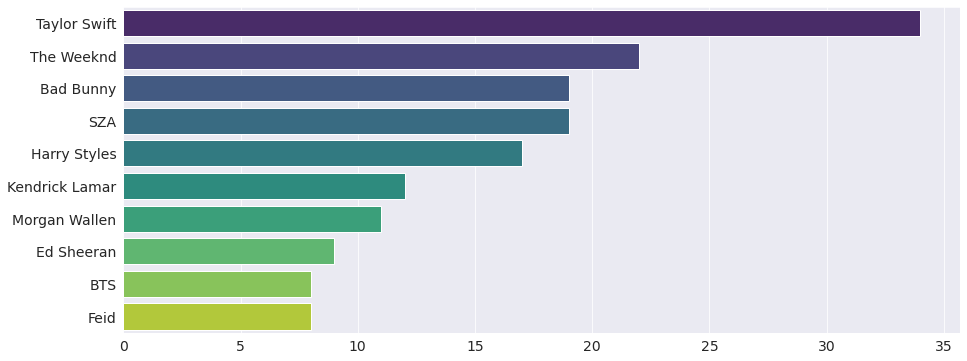

In [24]:


# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=top_artist.values, y=top_artist.index, palette='viridis')  
plt.xlabel=('Top Artists')  
plt.ylabel=('Number of Songs')  
plt.title=('Top 10 Artists with Most Songs')  



From the graph we can clearly see that 'Taylor Swift' is the artist with most number of songs produced i.e. 34 according to the dataset.And 'The Weekend' is the second artist with most number songs produced i.e. 22.


So for further Visualizations lets first check the data types of the columns

In [25]:
spotify_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

We will be removing the non numeric values in the streams column & changing its datatype to integer so its easy to perform calculations using it

In [26]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

In [27]:
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


#### Now lets identify the top 10 songs most streamed songs on spotify from the dataset

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
most_streamed_songs = spotify_df[['artist(s)_name','track_name','streams']].sort_values(by='streams', ascending=False).head(10)

In [30]:
num = 15

In [31]:
most_streamed_songs

,artist(s)_name,track_name,streams
55,The Weeknd,Blinding Lights,3.703895e+09
179,Ed Sheeran,Shape of You,3.562544e+09
86,Lewis Capaldi,Someone You Loved,2.887242e+09
620,Tones and I,Dance Monkey,2.864792e+09
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
162,"Drake, WizKid, Kyla",One Dance,2.713922e+09
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2.665344e+09
140,Imagine Dragons,Believer,2.594040e+09
725,"The Chainsmokers, Halsey",Closer,2.591224e+09
48,"The Weeknd, Daft Punk",Starboy,2.565530e+09


Now lets visualize the most streamed songs data

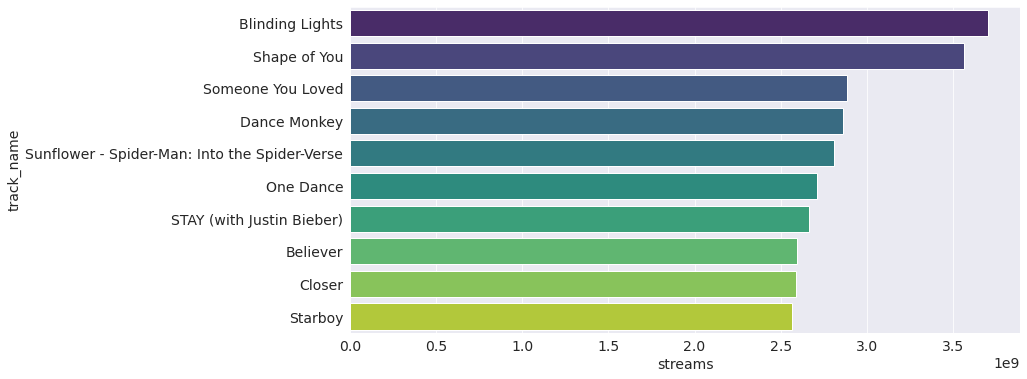

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_streamed_songs['streams'], y=most_streamed_songs['track_name'], palette='viridis')
plt.xlabel=('Number of Songs')  
plt.ylabel=('Top Artists')
plt.title=('Top 10 Artists with Most Songs')
plt.show()

From the Graph we can see that the song 'Blinding Lights' by 'The Weekend' is the most streamed song

We have also identified that there is an error for one record in the streams so we will remove it from the data frame

In [33]:
incorrect_value = spotify_df.iloc[574]

In [34]:
incorrect_value

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                                 NaN
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

In [35]:
spotify_df= spotify_df.dropna()

In [36]:
to_drop = ['BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
spotify_df = spotify_df[~spotify_df['streams'].isin(to_drop)]

We removed the row with the incorrect value now we can use this for further analysis

In [37]:
spotify_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

#### Now lets explore which are the top songs of all time in apple music charts.

In [38]:
top_applemusic_songs=spotify_df[['artist(s)_name','track_name','in_apple_playlists']].sort_values(by='in_apple_playlists',ascending = False).head(10)

In [39]:
top_applemusic_songs

,artist(s)_name,track_name,in_apple_playlists
55,The Weeknd,Blinding Lights,672
403,"Calvin Harris, Dua Lipa",One Kiss (with Dua Lipa),537
620,Tones and I,Dance Monkey,533
407,Dua Lipa,Don't Start Now,532
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),492
693,"Shawn Mendes, Camila Cabello",Seï¿½ï¿½o,453
86,Lewis Capaldi,Someone You Loved,440
127,Harry Styles,Watermelon Sugar,437
162,"Drake, WizKid, Kyla",One Dance,433
14,Harry Styles,As It Was,403


Now lets visualize the data

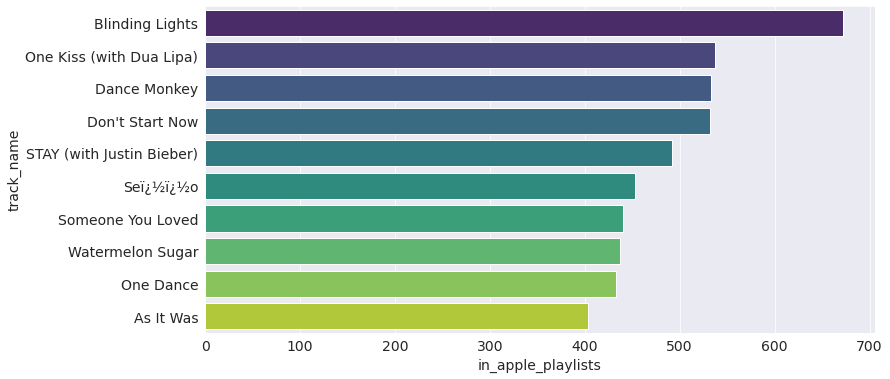

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_applemusic_songs['in_apple_playlists'],y=top_applemusic_songs['track_name'], palette = 'viridis')
plt.title=('top songs by apple playlist')

#### Now lets see the top songs released in the the year 2023

In [41]:
top_songs_2023 = spotify_df[['artist(s)_name','track_name','streams','released_year']].sort_values(by=['released_year','streams'], ascending=False).head(10)

In [42]:
top_songs_2023

,artist(s)_name,track_name,streams,released_year
12,Miley Cyrus,Flowers,1.316856e+09,2023
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,7.259801e+08,2023
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",7.219756e+08,2023
34,"Karol G, Shakira",TQG,6.189904e+08,2023
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,5.536341e+08,2023
49,"Ariana Grande, The Weeknd",Die For You - Remix,5.187451e+08,2023
10,"Bad Bunny, Grupo Frontera",un x100to,5.056714e+08,2023
16,Fifty Fifty,Cupid - Twin Ver.,4.967957e+08,2023
160,"Natanael Cano, Peso Pluma",PRC,4.360279e+08,2023
131,NewJeans,OMG,4.309775e+08,2023


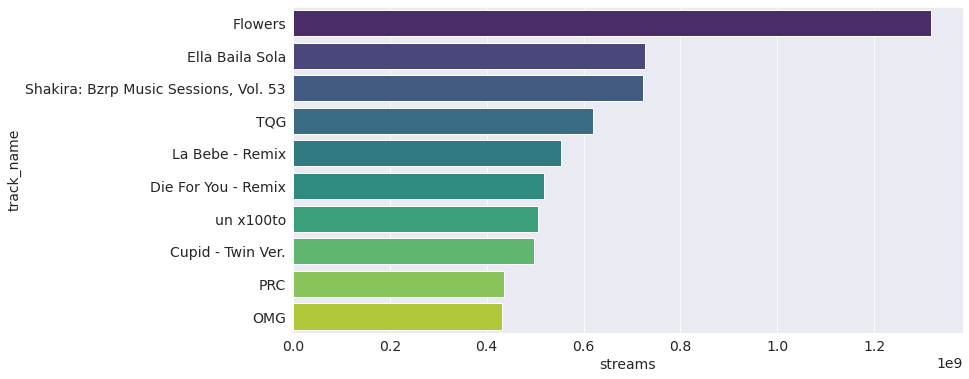

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_songs_2023['streams'],y=top_songs_2023['track_name'], palette = 'viridis')
plt.title =('top songs by apple playlist')

From the graph we can see that song 'Flowers' by 'Miley Cyrus' is the most streamed song from all the songs released in the year 2023

#### Now lets check the trend of audio features over the years

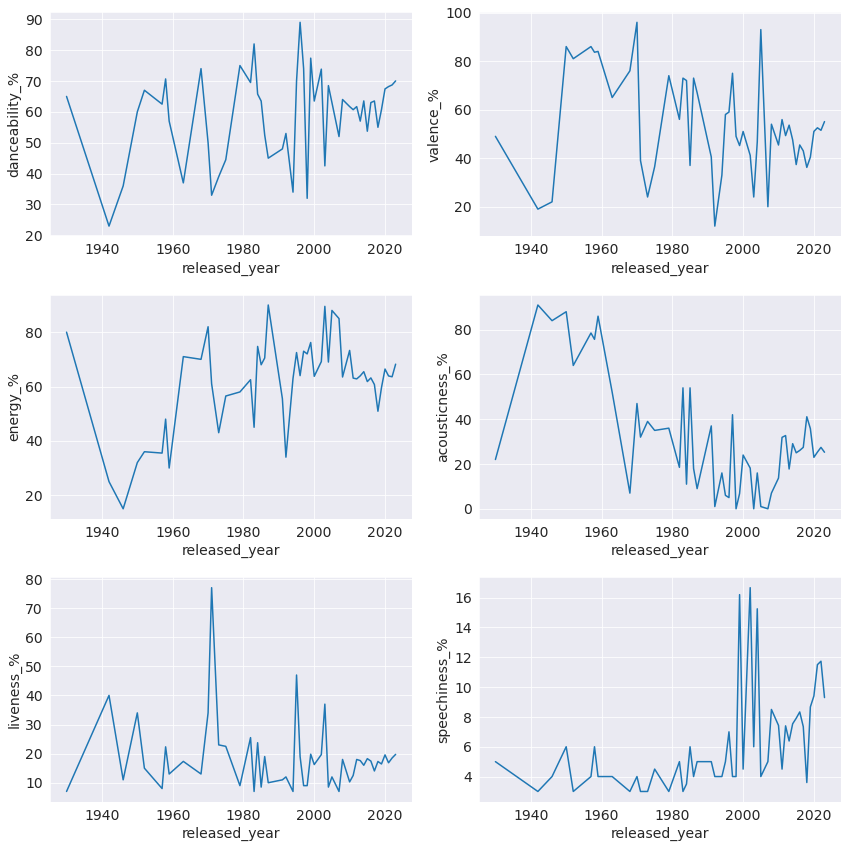

In [44]:
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
audio_features_by_year = spotify_df.groupby('released_year')[audio_features].mean().reset_index()

plt.figure(figsize=(12, 12))

for i, feature in enumerate(audio_features, start=1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.lineplot(data=audio_features_by_year, x='released_year', y=feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

This shows the trend of audio features over the past years. This shows
1. The energy_% has been increased over past few years
2. The acousticness_% has been decreased over past few years
3. the speechiness_% has been increased over past few years
4. Most of the songs has high danceabilty_% after the year 2000

#### Now lets analyze the correlation between charts and playlists of multiple platforms

First selecting the columns for cross platform analytics

In [45]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [46]:
cross_platform_columns =['in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts'
                                    ,'in_deezer_playlists','in_deezer_charts','in_shazam_charts']

Now plotting the correlation heatmap with seaborn

<AxesSubplot:>

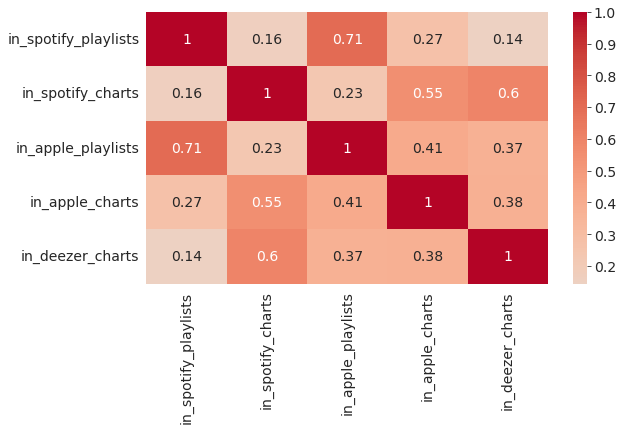

In [47]:
correlation_matrix = spotify_df[cross_platform_columns].corr()

sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center = 0)

The heatmap shows the spotify playlist and apple playlists are highly corelated and 
spotify charts and apple music charts & apple charts and apple playlists are also minutely correlated 

Let us save and upload our work to Jovian before continuing

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'

## Asking and Answering Questions





#### Q1: What are the top artists with most number of total streams 

In [50]:
top_artitst_df=spotify_df.groupby('artist(s)_name')['streams'].sum().to_frame().reset_index()

In [51]:
top_artitst_df = top_artitst_df.sort_values(by='streams', ascending=False).head(10)

In [52]:
top_artitst_df

,artist(s)_name,streams
571,The Weeknd,1.418555e+10
557,Taylor Swift,1.405366e+10
159,Ed Sheeran,1.390895e+10
222,Harry Styles,1.160865e+10
43,Bad Bunny,9.997800e+09
430,Olivia Rodrigo,7.442149e+09
170,Eminem,6.183806e+09
75,Bruno Mars,5.846921e+09
25,Arctic Monkeys,5.569807e+09
228,Imagine Dragons,5.272485e+09


<AxesSubplot:xlabel='streams', ylabel='artist(s)_name'>

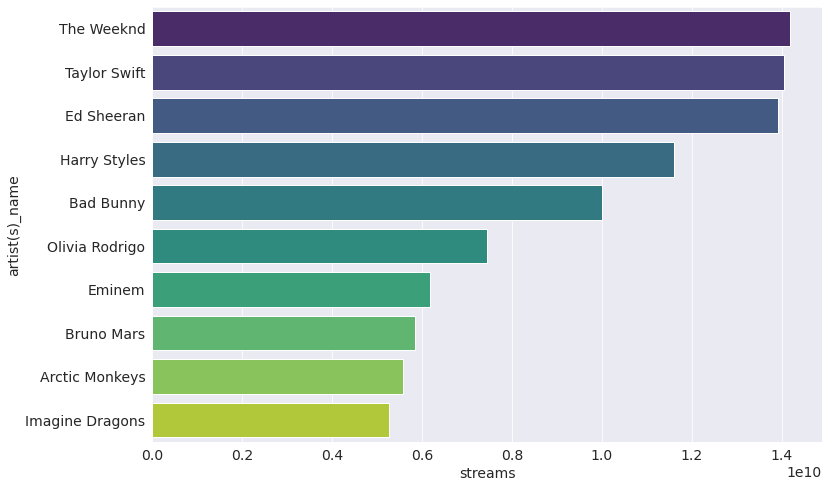

In [53]:
top_artitst_df.sort_values(by='streams',ascending= False)
plt.figure(figsize=(12,8))
sns.barplot(x='streams',y='artist(s)_name',data=top_artitst_df,palette = 'viridis')


With the graph we can see that 'The Weekend' is the most popular artist with total streams of nearly 14 billion

#### Q2: -  What are the number of tracks released per year?


In [54]:
year= spotify_df.groupby(['released_year'])['released_year'].count().reset_index(name = 'count').sort_values(['count'], ascending=False).head(15)

In [55]:
year

,released_year,count
48,2022,402
49,2023,175
47,2021,119
46,2020,37
45,2019,36
43,2017,23
42,2016,18
39,2013,13
40,2014,13
41,2015,11


<AxesSubplot:xlabel='released_year', ylabel='count'>

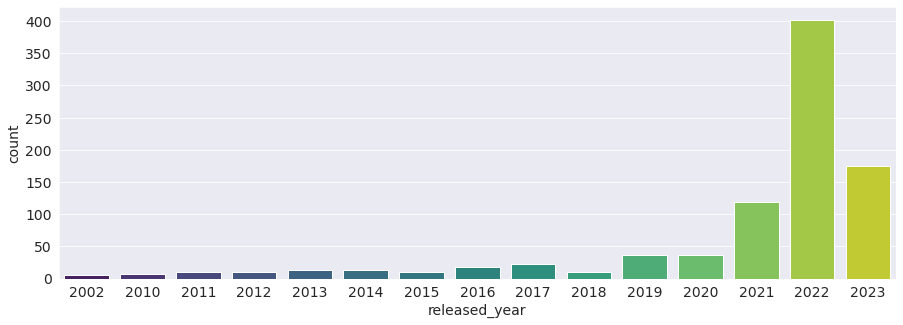

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(x='released_year', y ='count',data =year,palette= 'viridis')

After looking at the graph we can infer from it that most of the data is from 2020 to 2023 and most of the tracks in the dataset are released in 2022.

#### Q3: TODO - What are the top songs in which there are more than one artist who composed it

In [57]:
top_songs_2=spotify_df[['track_name','streams','artist_count']][spotify_df['artist_count'] > 1].sort_values(by='streams',ascending=False).head(10)

<AxesSubplot:xlabel='streams', ylabel='track_name'>

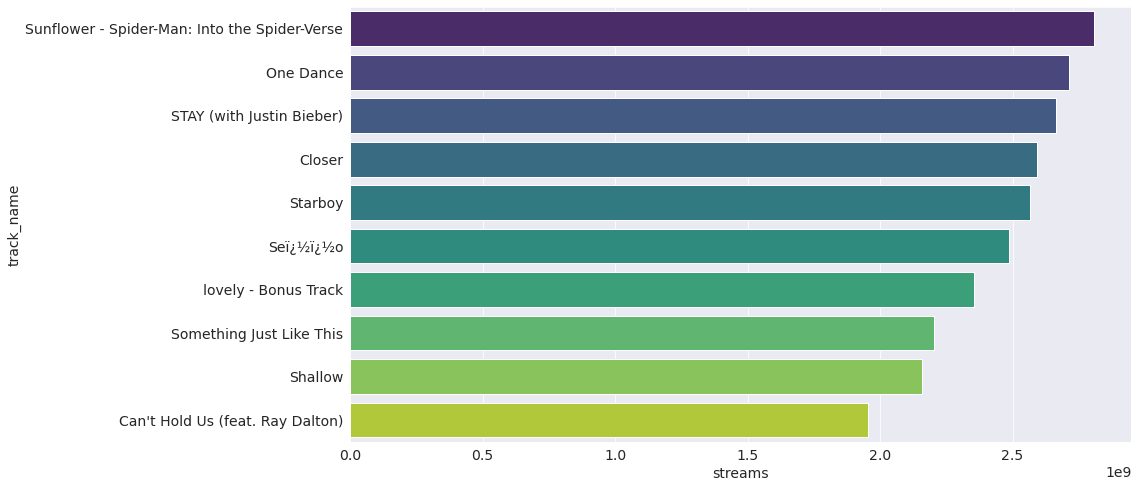

In [58]:
plt.figure(figsize=(14,8))
sns.barplot(x='streams',y='track_name',data=top_songs_2,palette = 'viridis')

These are the top 10 most streamed songs which are composed by more than 1 artist

#### Q4:  - What is the Correlation Between Danceability, Valence, and Energy


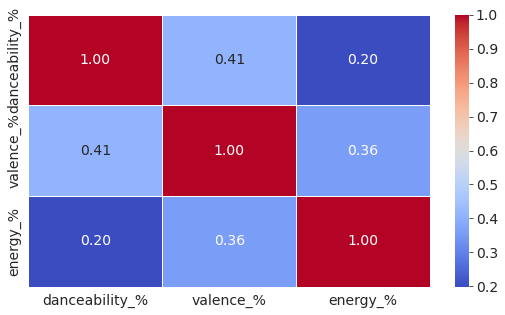

In [59]:
correlation_matrix = spotify_df[['danceability_%', 'valence_%', 'energy_%']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title=('Correlation Between Danceability, Valence, and Energy')

This graph shows that these attributes are little bit of a negative correlation between them as correlation coefficent between all of them is less than 0.5
  - Correlation between Danceability and Valence: 0.39
  - Correlation between Danceability and Energy: 0.16
  - Correlation between Valence and Energy: 0.35
  

#### Q5 We have identified that Weekend is the artist with most number of streams in the dataset now lets identify how many of his songs are in top 100 by streams

In [60]:
top_100_songs = spotify_df.sort_values(by='streams', ascending=False).head(100)
top_songs_weekend=top_100_songs[top_100_songs['artist(s)_name'] == 'The Weeknd']
no_of_taylor_swift_songs=len(top_songs_weekend)

In [61]:
top_songs_weekend

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
325,The Hills,The Weeknd,1,2015,5,27,25744,4,1.947372e+09,122,...,136,0,Minor,36,12,57,9,0,14,8
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1.647990e+09,68,...,134,C#,Minor,59,51,52,9,0,15,7
164,Save Your Tears,The Weeknd,1,2020,3,20,12688,13,1.591224e+09,197,...,118,0,Major,68,61,82,2,0,50,3
292,Call Out My Name,The Weeknd,1,2018,3,29,11087,6,1.449799e+09,151,...,134,C#,Major,45,17,60,21,0,33,4


By looking at the data we can see that there 5 songs of weekend which are in top 100 songs by stream. With this code we can change the name of artist and identify this info for any artist

Let us save and upload our work to Jovian before continuing.

In [62]:
import jovian

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'

## Inferences and Conclusion

  - Overall we can see the trends in music have changed from past years people are more likely to love song which has more beats     and more energy % into it.
  - There is a positive correlation between the number of Spotify playlists and total streams.
  - The Weekend is the artist with most number of total streams
  - Correlation between Danceability and Valence: 0.39
  - Correlation between Danceability and Energy: 0.16
  - Correlation between Valence and Energy: 0.35
  - Song 'Sunflower' is most popular song among the songs which is composed by more than single artist

In [64]:
import jovian

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'

## References and Future Work

Refrence Notebook - https://www.kaggle.com/code/sheikhahmednoor/most-streamed-spotify-songs-2023-eda/notebook

This Dataset can be used for a lot of purposes and I have barely managed to scratch its surface
Some other uses for the dataset could be-




1.Using the beats per minute (bpm), energy%,dancebility % to identify the average ratio between these and can be useful to for music artist to know how his song should be composed so that it could get famous.

2. We can also identify the yearly trends of streams with this dataset which will let us know how people have changed towards music in the past years

3 We can also identify the most used key in the top 100 most streamed songs to study music taste of audience

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manavarora3052001/spotify-songs-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manavarora3052001/spotify-songs-eda


'https://jovian.com/manavarora3052001/spotify-songs-eda'